<a href="https://colab.research.google.com/github/likhitha-dhanaraju/chat-gpt-sentiment-analysis/blob/main/02%20Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<big> Analysis of the Data Collected from Twitter & Reddit

### Packages Imports & Installation:

In [ ]:
# imports

import nltk
import string

# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Import specific modules from NLTK

from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


---------------------------------------------

### Loading the Dataset:

In [ ]:
# Load datasets from CSV files

Before_ChatGPT = pd.read_csv('/content/Before_chatGPT.csv')
After_ChatGPT = pd.read_csv('/content/after_chatGPT.csv')

In [ ]:
# Converting into List

Before_ChatGPT= list(Before_ChatGPT['Content'])
After_ChatGPT = list(After_ChatGPT['Content'])


In [ ]:
# Concatenate all columns from the 'Before_ChatGPT' dataset into the 'Before' string

Before = ''
for i in Before_ChatGPT:
  Before += i

# Concatenate all columns from the 'After_ChatGPT' dataset into the 'After' string

After = ''
for i in After_ChatGPT:
  After += i


---------------------------------------------

## Before_ChatGPT_release

##### Text Cleaning:

In [ ]:
# Tokenizing the text into sentences
Before_ChatGPT_release = nltk.sent_tokenize(Before)
After_ChatGPT_release = nltk.sent_tokenize(After)


In [ ]:
# POS tagging words after tokenizing
words_and_pos_tags = []
for sentence in Before_ChatGPT_release:
    words_and_pos_tags += nltk.pos_tag(nltk.word_tokenize(sentence))

In [ ]:
# Lemmatizing each word in the list of words and POS tags
lemmatizer = nltk.stem.WordNetLemmatizer()
lemma_words = [(lemmatizer.lemmatize(word), pos) for (word,pos) in words_and_pos_tags]
lemma_words_lowercased = [lemma.lower() for lemma, pos in lemma_words]

In [ ]:
# Setting up a set for stop words with the standard stop words
stop_words = set([])
stop_words = set(nltk.corpus.stopwords.words('english'))

# Adding custom stopwords to the set
custom_stopwords = ['ha','gpt-3','gpt3','openai',"n't",'ai','wa','gpt','gpt-j','gpt-4','gpt2', 'http', 'chatgpt',"chat", 'eth','collected','created','receieved','amp',
                    "→", "@foundation", "@openai","sold!", "offer", "created", "accept", "received!","eth", "collected", "foundation", "new", "just", "like","model",
                    "it's", "using", "previously", "owned", "sale!","secondary", "&amp;", "i'm", "#openai", "people", "don't","better", "time", "text", "think", "models",
                    "source","make"]
top_30_words = ['foundation', 'open', 'offer', 'model', 'made', 'received', 'accept', 'new', 'like', 'using', 'previously', 'owned', 'sale', 'time',
                'use', 'people', 'text', 'one', 'get', 'would', 'better', 'source', 'make', 'data']


custom_stopwords.extend(top_30_words)
stop_words.update(custom_stopwords)


all_removal_tokens = stop_words | set(string.punctuation)
all_removal_tokens |= set(["''","``"])

# Filtering out content words only, excluding removal tokens, and ensuring words are valid
content_words_only_before = [word for word in lemma_words_lowercased if re.match(r'\b\w+\b', word) and word not in all_removal_tokens]


# Regular expression pattern to match decimal numbers
pattern = r'\b\d+\.\d+\b'
float_values = list(set([(re.search(pattern, word).group()) if re.search(pattern, word) else "" for word in content_words_only_before]))


# Filtering out content words only to remove decimals and any other numbers
for word in content_words_only_before:
  if word.isdecimal() or word in float_values:
    content_words_only_before.remove(word)


# Calculating the frequency distribution of content words
freq  = nltk.probability.FreqDist(content_words_only_before)

##### WordCloud:

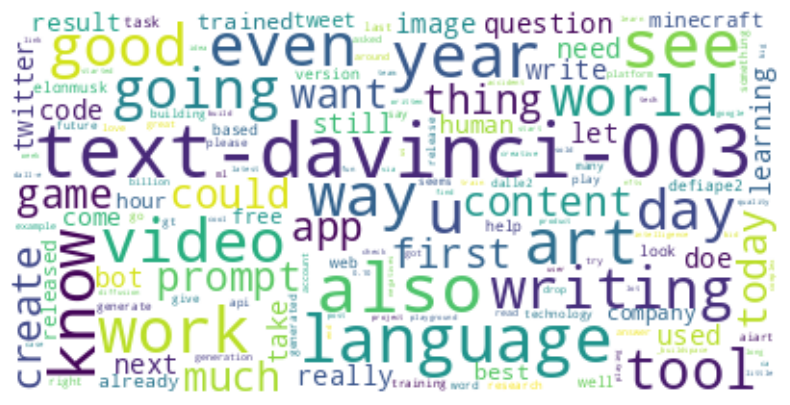

In [ ]:
from wordcloud import WordCloud

# Generating the word cloud from the frequency distribution of content words
wc = WordCloud(background_color="white", max_words=1000,
               contour_width=3, contour_color='firebrick').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Frequency Distribution:

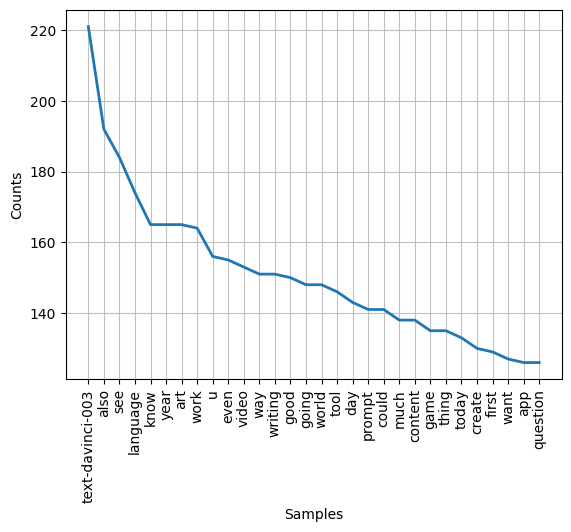

In [ ]:
# Plotting the frequencies of the top 30 content words in a bar chart
freq.plot(30,cumulative=False)
plt.show()

#### Corpus Matrix

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense
from nltk.tokenize import word_tokenize


# Tokenizing the documents in the corpus before ChatGPT release
before_tokenized_corpus = [word_tokenize(doc.lower()) for doc in Before_ChatGPT_release]

# Creating a Gensim Dictionary object from the tokenized corpus
before_dictionary = Dictionary(before_tokenized_corpus)

# Converting the tokenized corpus into a Gensim format (bag-of-words representation)
before_gensim_corpus = [before_dictionary.doc2bow(doc) for doc in before_tokenized_corpus]

# Creating a TF-IDF model from the bag-of-words representation
before_tfidf_model = TfidfModel(before_gensim_corpus)

# Transforming the corpus into TF-IDF space
before_corpus_tfidf = before_tfidf_model[before_gensim_corpus]

# Converting the TF-IDF corpus into a dense matrix representation
before_corpus_matrix = corpus2dense(before_corpus_tfidf, num_terms=len(before_dictionary))

print("Corpus Matrix (Document-Term Matrix):")
# print(before_corpus_matrix.shape)
print(before_corpus_matrix)


Corpus Matrix (Document-Term Matrix):
[[0.03595279 0.02990273 0.         ... 0.         0.01569322 0.0212973 ]
 [0.16744514 0.2089017  0.         ... 0.         0.         0.        ]
 [0.06539334 0.05438908 0.         ... 0.         0.08563164 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.18255778 0.        ]
 [0.         0.         0.         ... 0.         0.         0.2477495 ]
 [0.         0.         0.         ... 0.         0.         0.2477495 ]]


#### Sentiment Analysis

In [ ]:
# Creating an object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Polarity Score for each sentence in the corpus before ChatGPT release
sentiments = [sid.polarity_scores(sentence) for sentence in Before_ChatGPT_release]

# Finding the top 5 most positive and most negative sentences based on compound sentiment score
top_5_positive = sorted(sentiments, key=lambda x: x['compound'], reverse=True)[:5]
top_5_negative = sorted(sentiments, key=lambda x: x['compound'])[:5]

sorted_sentences = sorted(enumerate(sentiments), key=lambda x: x[1]['compound'], reverse=True)

# Calculating the overall sentiment score for the corpus before the release
overall_sentiment = sum(sentiments[i]['compound'] for i in range(len(sentiments))) / len(sentiments)
print(f"Overall sentiment before the release: {overall_sentiment:0.3f}")



Overall sentiment before the release: 0.154


---------------------------------------------

## After_ChatGPT_release

##### Text Cleaning:

In [ ]:
# POS tagging words after tokenizing
words_and_pos_tags = []
for sentence in After_ChatGPT_release:
    words_and_pos_tags += nltk.pos_tag(nltk.word_tokenize(sentence))

In [ ]:
# Lemmatizing each word in the list of words and POS tags
lemmatizer = nltk.stem.WordNetLemmatizer()
lemma_words = [(lemmatizer.lemmatize(word), pos) for (word,pos) in words_and_pos_tags]
lemma_words_lowercased = [lemma.lower() for lemma, pos in lemma_words]

In [ ]:
# Setting up a set for stop words with the standard stop words
stop_words = set([])
stop_words = set(nltk.corpus.stopwords.words('english'))

# Adding custom stopwords to the set
custom_stopwords = ['ha','gpt-3','gpt3',"n't",'ai','wa','gpt','gpt-j','gpt2','http','like','use','make','year','using','one','get',
'would','new','know','even','people','good','say','also','want','every','ask','doe']
stop_words.update(custom_stopwords)

all_removal_tokens = stop_words | set(string.punctuation)
all_removal_tokens |= set(["''","``"])

# Filtering out content words only, excluding removal tokens, and ensuring words are valid
content_words_only = [word for word in lemma_words_lowercased if re.match(r'\b\w+\b', word) and word not in all_removal_tokens]

# Regular expression pattern to match decimal numbers
pattern = r'\b\d+\.\d+\b'
float_values = list(set([(re.search(pattern, word).group()) if re.search(pattern, word) else "" for word in content_words_only]))


# Filtering out content words only to remove decimals and any other numbers
for word in content_words_only:
  if word.isdecimal() or word in float_values:
    content_words_only.remove(word)

# Calculating the frequency distribution of content words
freq  = nltk.probability.FreqDist(content_words_only)

##### WordCloud:

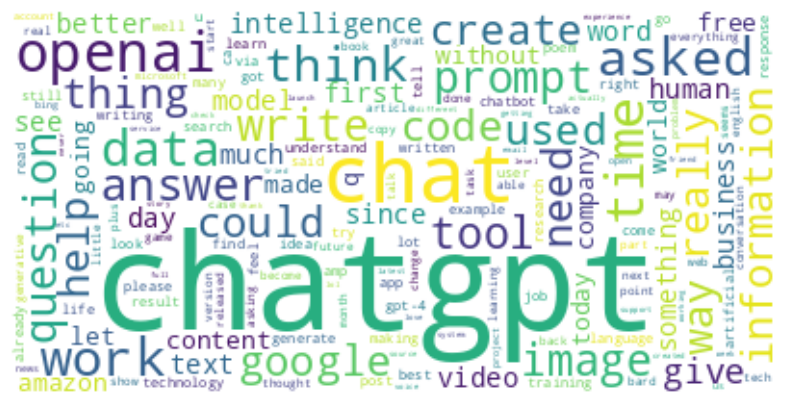

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000,
               contour_width=3, contour_color='firebrick').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Frequency Distribution:

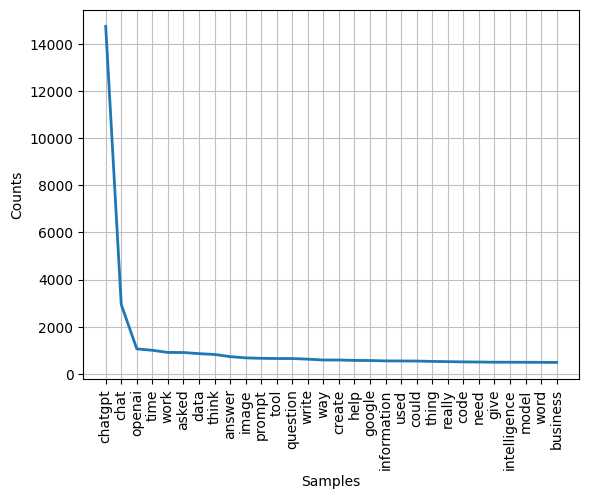

In [ ]:
# Plotting the frequencies of the top 30 content words in a bar chart
freq.plot(30,cumulative=False)
plt.show()

#### Corpus Matrix

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense
from nltk.tokenize import word_tokenize


# Tokenizing the documents in the corpus after ChatGPT release
After_tokenized_corpus = [word_tokenize(doc.lower()) for doc in After_ChatGPT_release]

# Creating a Gensim Dictionary object from the tokenized corpus
After_dictionary = Dictionary(After_tokenized_corpus)

# Converting the tokenized corpus into a Gensim format (bag-of-words representation)
after_gensim_corpus = [After_dictionary.doc2bow(doc) for doc in After_tokenized_corpus]

# Creating a TF-IDF model from the bag-of-words representation
After_tfidf_model = TfidfModel(after_gensim_corpus)

# Transforming the corpus into TF-IDF space
After_corpus_tfidf = After_tfidf_model[after_gensim_corpus]

# Converting the TF-IDF corpus into a dense matrix representation
After_corpus_matrix = corpus2dense(After_corpus_tfidf, num_terms=len(After_dictionary))

print("Corpus Matrix (Document-Term Matrix):")
print(After_corpus_matrix)


Corpus Matrix (Document-Term Matrix):
[[0.14159042 0.         0.         ... 0.         0.         0.        ]
 [0.03033497 0.10559672 0.         ... 0.         0.         0.05991538]
 [0.00530862 0.01231961 0.07532853 ... 0.01675277 0.01589451 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.1801423 ]
 [0.         0.         0.         ... 0.         0.         0.1801423 ]
 [0.         0.         0.         ... 0.         0.         0.1801423 ]]


#### Sentiment Analysis

In [ ]:
# Creating an object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Polarity Score for each sentence in the corpus before ChatGPT release
sentiments = [sid.polarity_scores(sentence) for sentence in After_ChatGPT_release]

# Finding the top 5 most positive and most negative sentences based on compound sentiment score
top_5_positive = sorted(sentiments, key=lambda x: x['compound'], reverse=True)[:5]
top_5_negative = sorted(sentiments, key=lambda x: x['compound'])[:5]

sorted_sentences = sorted(enumerate(sentiments), key=lambda x: x[1]['compound'], reverse=True)

# Calculating the overall sentiment score for the corpus before the release
overall_sentiment = sum(sentiments[i]['compound'] for i in range(len(sentiments))) / len(sentiments)
print(f"Overall sentiment after the release: {overall_sentiment:0.3f}")



Overall sentiment after the release: 0.167


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Topic Modelling:

##### Method 1:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Function to display topics from LDA model
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics["Topic %d" % (topic_idx)] = " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topics

# Loaded dataset
df_before = Before_ChatGPT.copy()
df_after = After_ChatGPT.copy()

extended_additional_stop_words=['people','better','https','eth']
complete_stop_words = list(set(list(ENGLISH_STOP_WORDS) + extended_additional_stop_words))

# Number of topics and top words to display
n_topics = 5
n_top_words = 10

# Vectorization and LDA for 'Before_chatGPT.csv'
tfidf_vectorizer_before = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=complete_stop_words)
tfidf_before = tfidf_vectorizer_before.fit_transform(df_before)
lda_before = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_before.fit(tfidf_before)

# Vectorization and LDA for 'after_chatGPT.csv'
tfidf_vectorizer_after = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=complete_stop_words)
tfidf_after = tfidf_vectorizer_after.fit_transform(df_after)
lda_after = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_after.fit(tfidf_after)

# Displaying topics for 'Before_chatGPT.csv'
topics_before_final = display_topics(lda_before, tfidf_vectorizer_before.get_feature_names_out(), n_top_words)

# Displaying topics for 'after_chatGPT.csv'
topics_after_final = display_topics(lda_after, tfidf_vectorizer_after.get_feature_names_out(), n_top_words)

# Printing the topics for each dataset
print("Topics for 'Before_chatGPT.csv':")
for topic_number, topic in topics_before_final.items():
  print(topic_number,':', topic)
print("\nTopics for 'after_chatGPT.csv':")
for topic_number, topic in topics_after_final.items():
  print(topic_number,':', topic)

Topics for 'Before_chatGPT.csv':
Topic 0 : sold collected foundation 10 offer 01 15 openai delegate voted
Topic 1 : sold collected foundation 10 offer 15 25 received accept created
Topic 2 : gpt openai ai text davinci open model 003 new just
Topic 3 : ai openai open collected foundation gpt sold owned sale secondary
Topic 4 : offer foundation collected sold received accept created 10 owned previously

Topics for 'after_chatGPT.csv':
Topic 0 : chatgpt gpt chat ai openai like use thank just good
Topic 1 : chatgpt gpt chat ai use like plus don just openai
Topic 2 : chatgpt gpt chat data ai using poem training like work
Topic 3 : chatgpt ai use gpt chat year amazon like ask love
Topic 4 : chatgpt gpt chat ai make 10 likes ask like just


______________________________________________________________________________________________________________

##### Method 2:

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

# Loading datasets
df_before = Before_ChatGPT.copy()
df_after = After_ChatGPT.copy()


stop_words = set([])
stop_words = set(nltk.corpus.stopwords.words('english'))

all_removal_tokens = stop_words | set(string.punctuation)
all_removal_tokens |= set(["''","``"])

# Extend the stop words list with custom list
extended_additional_stop_words = [
    # Additional words for more comprehensive filtering
    "→", "🌐", "✨", "💌", "@foundation", "@openai", "sold!", "offer", "created", "accept", "received!",
    "0.10", "5", "0.15", "0.05", "0.20", "0.01", "0.07", "eth", "collected", "foundation", "new", "just",
    "like", "model", "it's", "using", "previously", "owned", "sale!", "secondary", "&amp;", "i'm", "#openai",
    "people", "don't", "better", "time", "text", "think", "models", "source", "make",
    "actually", "probably", "thing", "things", "lot", "kind", "really", "see", "way", "well", "much",
    "get", "got", "go", "going", "let", "know", "said", "say", "says", "want", "wanted", "yeah", "yes",
    "you're", "you've", "your", "you'll", "we're", "we've", "we'll", "they're", "they've", "they'll", "isn't",
    "aren't", "wasn't", "weren't", "hasn't", "haven't", "hadn't", "doesn't", "don't", "didn't", "won't",
    "wouldn't", "shouldn't", "can't", "cannot", "could", "couldn't", "might", "mightn't", "mustn't", "shall",
    "shan't", "should", "would", "used", "use", "using",'-'
]

extended_stop_words = list(STOPWORDS) + extended_additional_stop_words + list(all_removal_tokens) + list(content_words_only_before)


# Tokenization and stop word removal
texts_before = [[word for word in document.lower().split() if word not in extended_stop_words]
                for document in df_before]

texts_after = [[word for word in document.lower().split() if word not in extended_stop_words]
               for document in df_after]


In [ ]:
# Create a Gensim Dictionary
id2word_before = corpora.Dictionary(texts_before)
id2word_after = corpora.Dictionary(texts_after)

# Create a corpus
corpus_before = [id2word_before.doc2bow(text) for text in texts_before]
corpus_after = [id2word_after.doc2bow(text) for text in texts_after]

# Apply LDA
lda_model_before = LdaModel(corpus_before, id2word=id2word_before, num_topics=5, iterations=500, passes = 20)
lda_model_after = LdaModel(corpus_after, id2word=id2word_after, num_topics=5,iterations=500, passes = 20)

# Print the topics
topics_before = lda_model_before.print_topics()
topics_after = lda_model_after.print_topics()


In [ ]:
print("Topics for 'Before_chatGPT.csv':")
for topic in topics_before:
    print(topic)

print("\nTopics for 'after_chatGPT.csv':")
for topic in topics_after:
    print(topic)

Topics for 'Before_chatGPT.csv':
(0, '0.019*"gpt-3" + 0.018*"ai" + 0.012*"open" + 0.005*"it’s" + 0.005*"openai\'s" + 0.005*"openai" + 0.004*"chat" + 0.004*"#aiart" + 0.004*":)" + 0.004*"i\'ve"')
(1, '0.032*"open" + 0.008*"id," + 0.008*"ai" + 0.007*"gpt3" + 0.006*"out!" + 0.005*"#ai" + 0.005*"platform." + 0.005*"posts" + 0.005*"below." + 0.004*"security,"')
(2, '0.009*"gpt-3" + 0.005*"0.03" + 0.004*"bid:" + 0.003*"🤺" + 0.003*"gpt-3." + 0.002*"gpt-3," + 0.002*"#1" + 0.002*"drop!" + 0.002*"open" + 0.002*"0xb567e..."')
(3, '0.081*"gpt-3" + 0.042*"openai" + 0.038*"ai" + 0.016*"open" + 0.013*"gpt3" + 0.006*"#ai" + 0.004*"#gpt3" + 0.004*"data" + 0.003*"0.02" + 0.003*"model."')
(4, '0.023*"ai" + 0.017*"open" + 0.013*"gpt-3" + 0.005*"gpt" + 0.004*"#ai" + 0.004*"openai\'s" + 0.004*"openai" + 0.003*"questions" + 0.003*"chat" + 0.003*"model,"')

Topics for 'after_chatGPT.csv':
(0, '0.108*"chatgpt" + 0.010*"ai" + 0.009*"openai" + 0.005*"chatgpt," + 0.004*"#chatgpt" + 0.004*"questions" + 0.003*"chat